¡A BARRIGA LLENA CORAZÓN CONTENTO!

ESTE ES MI PROYECTO DEL PRIMER SEMESTRE DE LAS ASIGNATURAS INTRODUCCIÓN A CIENCIA DE DATOS Y PROGRAMACIÓN
                               

En este proyecto tiene como objetivo por medio de datos contar una historia respondieron una serie de interrogantes sobre los restaurantes y bares de La Habana, Capital de Cuba

Importación de las bibliotecas de Python utilizadas en el proyecto  :

In [1]:

from IPython.display import Image
from library import media
from library import count_muni
from library import pyplot_bar
from library import drinks
from library import map
from library import search_person
from library import percent
from library import mariscos
from library import go_to
from library import comunications
from library import bar
from library import camarones
from library import ice_cream
from library import restaurant
from library import bar_hv
from library import median_for_municipality
from library import graph_bar_hv
from library import df_hv
from library import graph_drinks_hv
from library import count_drinks
from library import graph_dish_hv
from library import dlvrs
from library import porcent
from library import pb
from library import df_calamares
from library import df_municipality
import warnings



Con ayuda de la biblioteca de Pandas de Python le muestro un análisis de los restaurantes de La Habana, cuyos menus los conseguí por medio del canal de Telegram MenuCuba, menus de lugares que han visitado mis familiares, lugares que ido persolmente para obtener información y del grupo de Whatsapp del Grupo de Ciencia de Datos de la Matcom, donde estudio.

In [2]:
print("Abreviatura De Los Municipios De La Habana :")

df_municipality

Abreviatura De Los Municipios De La Habana :


,Abreviatura,Nombre Completo Del Municipio
0,AN,Arroyo Naranjo
1,BY,Boyero
2,CH,Centro Habana
3,CR,Cotorro
4,CT,Cerro
5,DO,Diez de Octubre
6,GB,Guanabacoa
7,HE,Habana del Este
8,HV,Habana Vieja
9,LL,La Lisa


Para hacer un resultados más rápido cree una función de python con la ayuda de las bibiotecas Pandas y Numpy para el cálculo de las medias de los diferentes tipos de plato dentro de un municipio en específico de manera automática.

¡ Let´ GO !

¿ CÓMO SE COMPORTAN LOS PRECIOS DE UN TIPO DE PLATO POR LOS MUNICIPIOS DE LA HABANA ?

Seguro le ha surgido la duda, ¿ en que municipio es más caro un cierto tipo de plato ?, o ¿dónde es más barato? . Pero hay que estar al tanto de ciertos factores como el flujo de turistas en el municipio o la solvencia económica de sus habitantes, por lo que resulta necesario identificar con color verde las regiones que tienenen alto flujo de turistas y con color rojo las que tienen baja las visitas de extranjeros, lo que demuestra que mientras más turistas allá mayor serán los precios ya que son los que más condiciones económicas tienen para pasar un buen rato y comer comidas caras.

 Cuando una persona visita un restaurante lo primero que pide es un entrante para ir entreteniendo el estómago mientras preparan la comida que va llenar la barriga sin espacio para, por lo que construí la siguiente grafica paara comparar los precios de los entrantes por lo que es interesante saber alrededor de que precios se podría enfretar una persona al visitar un restaurante o un Bar. 
  Para ello hice la siguiente que lo muestra claramente que el municipio con los entrantes más caros tiene una alta tasa de turismos

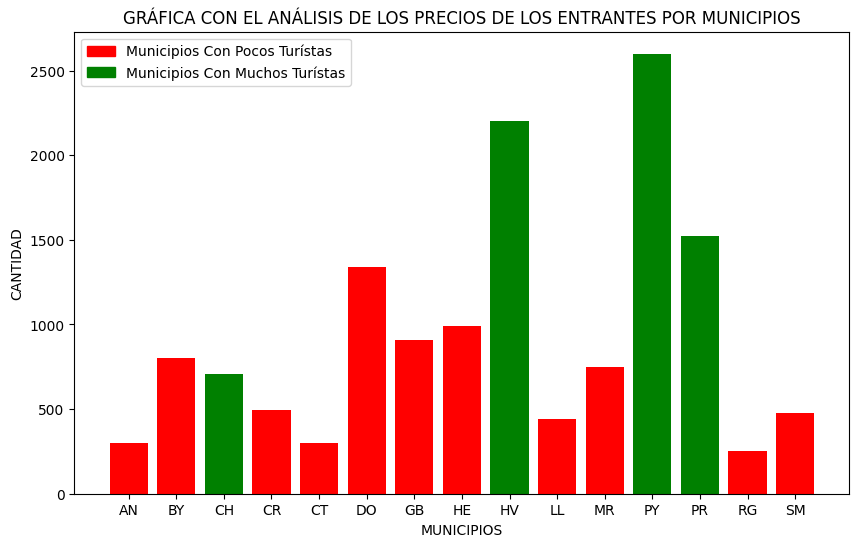

In [29]:
x = ['AN', 'BY', 'CH', 'CR', 'CT', 'DO', 'GB', 'HE', 'HV','LL','MR','PY','PR','RG','SM']
warnings.filterwarnings("ignore", category=UserWarning, message="Creating legend with loc='best' can be slow with large amounts of data.")
app = []
for ap in x:
    app.append(media(ap,"appetizers")) 
    
pyplot_bar(app,"GRÁFICA CON EL ANÁLISIS DE LOS PRECIOS DE LOS ENTRANTES POR MUNICIPIOS")

Después de difrutar de un sabroso entrante,  es necesario para llenarse el estómago es bueno consumir un plato fuerte, los cuaes pueden estar elaborados  por carnes de tierra, mariscos, risottos con un fuerte contenido alimenticio por lo que elabore la siguiente gráfica para hacer un análisis de los precios de los platos principales de los restaurantes de casa municipio, donde se puede apreciar que sigue prevaleciendo los altos precios en zonas con alta concentración de extranjeros, algo que  esperaba, pues se me hace imposible a mi y a mis padres comer en no de los lugares que encabezan la gráfca.

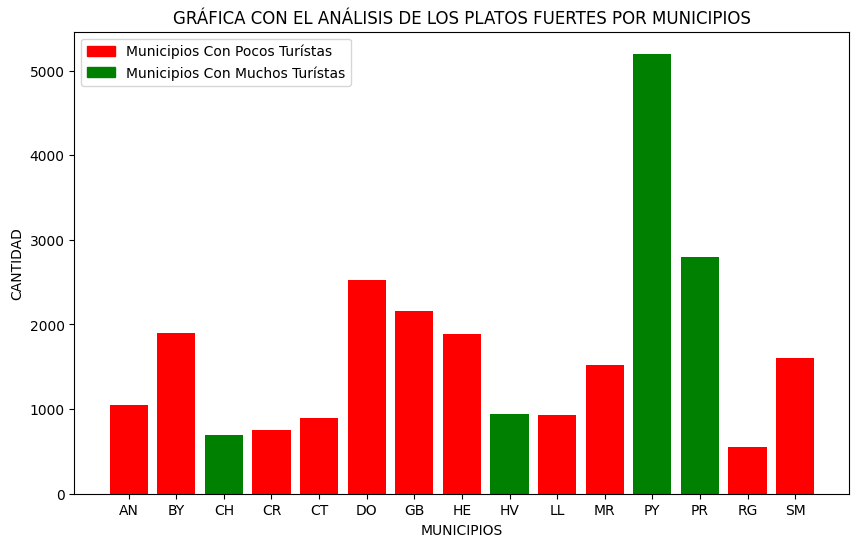

In [4]:
md = []
for pp in x:
    md.append(media(pp,"main_dishes"))
pyplot_bar(md, "GRÁFICA CON EL ANÁLISIS DE LOS PLATOS FUERTES POR MUNICIPIOS")

 Ahora como fanático  de la comida italiana les comparto una gráfica con la comparación de los precios de las pizzas. En la cual se puede apreciar que encabezan la lista municipios o los mal llamados "Monte", ya que ahí al haber una baja atracción turística, lo más rentable para ofertar a los cubanos son las pizzas, por lo que hay sitios que exceden los precios a costilla del hambre ajena

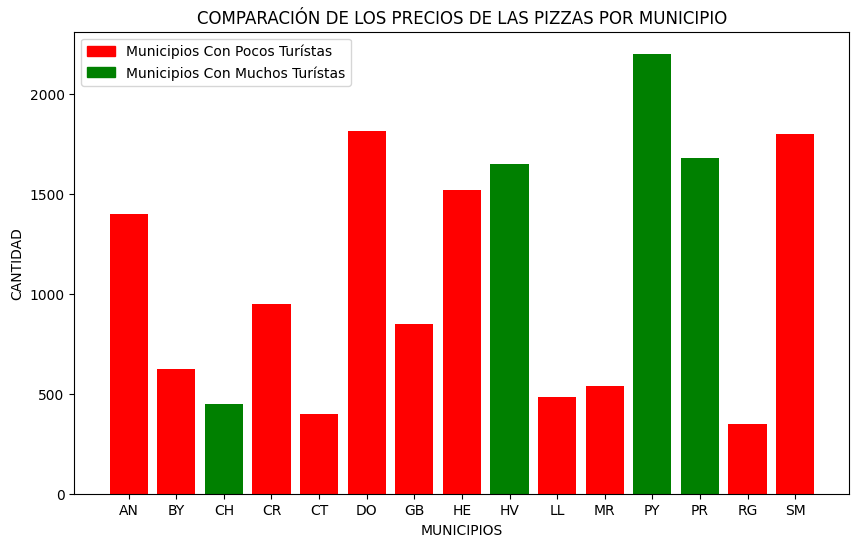

In [5]:
pz = []
for p in x:
    pz.append(media(p,"pizzas"))
pyplot_bar(pz, "COMPARACIÓN DE LOS PRECIOS DE LAS PIZZAS POR MUNICIPIO")


 Para bajar la comida no baja sólo con la fuerza de gravedad, no, nececesita, de una pequeña pero cara ayuda, que son los bebidas, que ayudan a la comida a bajar en el corto período de tiempo en que se permanece en un restaurante, por lo que les comparto la comparativa por municipio.

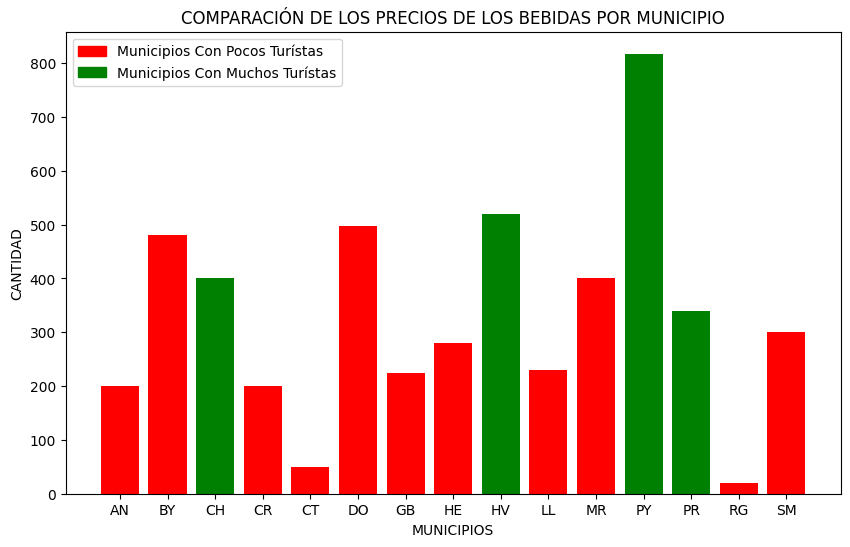

In [6]:
dk = []
for d in x:
    dk.append(media(d,"drinks"))
pyplot_bar(dk, "COMPARACIÓN DE LOS PRECIOS DE LOS BEBIDAS POR MUNICIPIO")

 Yo un día trabajando en el proyecto le pregunto a mi madre, que pregunta le gustaría responder sobre los precios de las bebidas que cada vez están más caras. Y como cubana al fin me dijo que le interesaría saber la relación de precio entre la cerveza y los otros líquidos, y como a mi me gusta más el refreso que las bebidas alcohólicas me tome el atrevimiento de incuir los refrescos en el análisis. Por lo que para compartir el resultado con usted le comparto una gráfica de pastel y una barras que lo muestra de manera clara la relación de precios entre la cerveza, los refrescos y las otras bebidas alcohólicas y no alcohólicas.

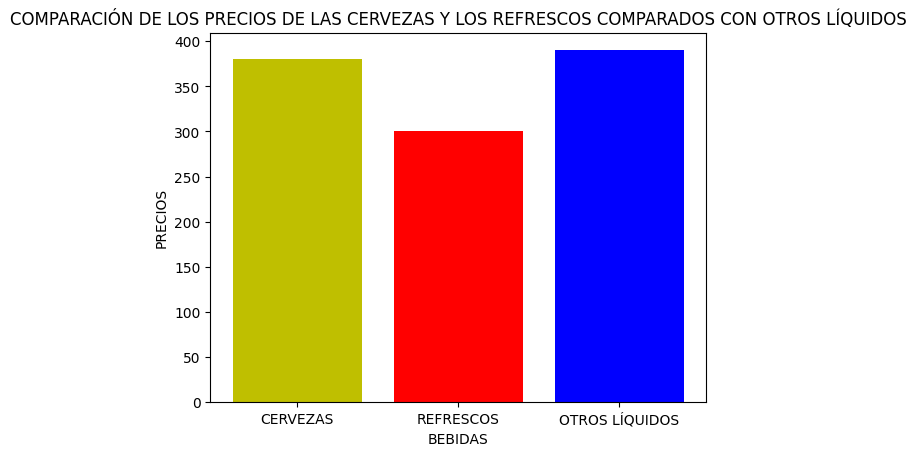

In [7]:
drinks()

 ¿Ya estás lleno verdad?, pero no se ha terminado todavía, aún falta más.

 Yo soy cubano, y como todo cubano sufre del problema del transporte, por que hay veces que no puedo ir presencialmente a los lugares, por lo que si tengo hambre y no puedo salir de mi casa, no me queda otra opción que solicitar un servicio de mensajería si el restaurante elegido para la compra lo ofrece. Por lo que quie haer un análisis para ver como es el comportamiento de dichos servicios de mensajería en la capital  de Cuba.

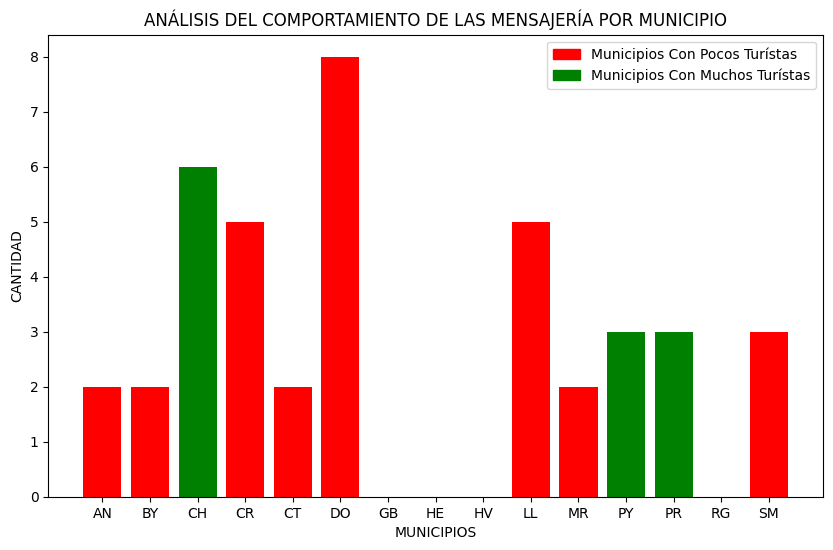

In [8]:

pyplot_bar(dlvrs, "ANÁLISIS DEL COMPORTAMIENTO DE LAS MENSAJERÍA POR MUNICIPIO")

 Yo mirando en redes sociales, como critican el salario de Cuba, donde ponen mucho enfasis en que gustos se puede dar un cubano con el fruto del trabajo de un mes, quise hacer un cálculo basado en los datos que capturé con el por ciento de lugares que pueden ser accedidos con el salario de un cubano, el cual conforma la mayor parte de la clientera de un restaurante cubano.

In [9]:

print(" En base a un cálculo utilizando la bibioteca Numpy , métodos numéricos de python y tomando como referencia el salario media de Cuba en 2023 publicado en el anuario estadístico de 2024 pude llegar al resultado de que: ")
print(f"UN {porcent} % DE LOS RESTAURANTES ANÁLIZADOS NO EXIGEN UN PRESUPUESTO MAYOR A AL SALARIO MEDIA DE CUBA.")

 En base a un cálculo utilizando la bibioteca Numpy , métodos numéricos de python y tomando como referencia el salario media de Cuba en 2023 publicado en el anuario estadístico de 2024 pude llegar al resultado de que: 
UN 56.15763546798029 % DE LOS RESTAURANTES ANÁLIZADOS NO EXIGEN UN PRESUPUESTO MAYOR A AL SALARIO MEDIA DE CUBA.


 Y también debe querer saber cual municipio tiene mayor cantidad que otros, por lo que les comparto la siguiente gráfica comparativa:

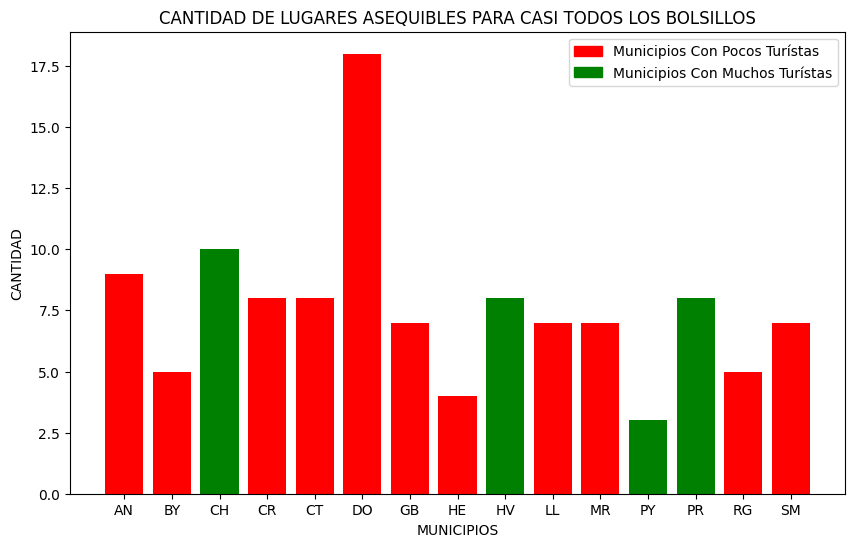

In [10]:

pyplot_bar(pb, "CANTIDAD DE LUGARES ASEQUIBLES PARA CASI TODOS LOS BOLSILLOS")

  La Curiosidad mató al gato pero el gato no se murió por saber cuál es el precio media para comer en cada municipio de La Habana, aunque el gato de por si come donde sea, pero cuando se trata de humanos la cosa cambia, porque hay bolsillos y bolsillos. Por lo que les muestro un resúmen con los precios media de la industria gastronómica de cada municipio. 

In [11]:
median_for_municipality()

,restaurante,Costos Media De Los Restaurantes Por Municipio
0,Arroyo Naranjo,2655.0
1,Boyero,6280.0
2,Centro Habana,3040.0
3,Cotorro,2595.0
4,Cerro,4198.5
5,Diez de Octubre,4250.0
6,Guanabacoa,3285.0
7,Habana del Este,6031.0
8,Habana Vieja,8588.5
9,La Lisa,3770.0


A continuación les muestro un mapa con información básica de los restaurantes análizados :

In [12]:
map()

 Aquí les compartó un breve sistema de recomendación basado en un municipio de preferencia con el que se cuenta y el tipo de cocina :

In [13]:
search_person()

  Una pregunta en que siempre tengo duda a la hora de eligir un restaurante en que comer, es saber si cobran el tan famoso diez por ciento que genera tanto enojo en los clientes, ya que a parte que la comida es sumamente cara que te cobren un diez por ciento de lo consumido por servicio es aparte de un abuso,es una forma de cobrarle más a los clientes, por lo que les comparto una gráfica de pastel con con el por ciento que representan los restaurantes que cobran un diez por ciento, los que cobran un cinco por ciento y los que no no cobran por servicio.

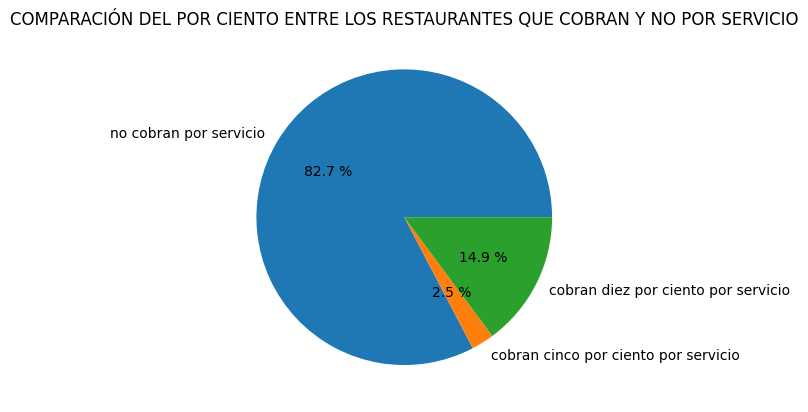

In [14]:
percent()

 No siempre una persona se puede comer todo lo que le sirven o no quiere consumir los alimentos en el lugar,por lo que tiene que recurrir a gastar un poco más pasar más pasar la comida sobrante en embases para llevar, en caso de haber consumido los alimentos en el lugar o comprar todo y llevárselo, y así no paga el diez por ciento por servicio y disfruta de los alimentos en la comidad del hogar.

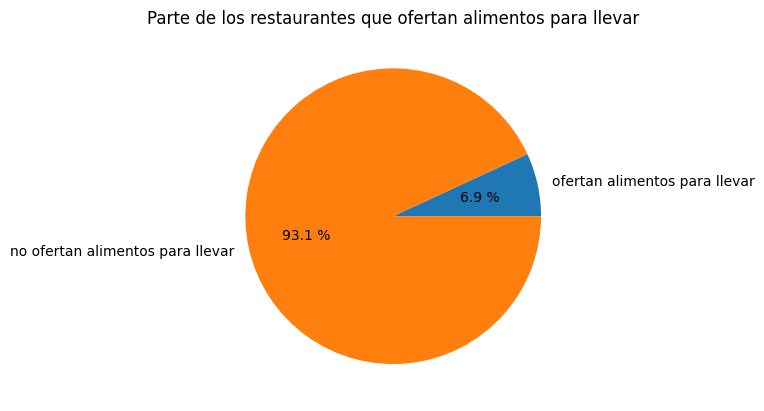

In [15]:

go_to() 

 Un día mirando una telenovela en que piden calamar en un restaurante, mi mamá me pregunta ¿ dónde hay calamar porque hace tiempo que no lo como ?, y yo le respondo que en el proyecto de ciencia de datos en que yo estoy trabajando hay una cantidad de restaurantes en que hay calamares, y me dice -pero mijo, ¿por que no me lo dijiste?, con el tiempo que yo llevo sin comer calamar- y yo digo - ¡Ah!, me diste una buena idea, con la comparación de los precios de los diferentes platos de mariscos como plato fuerte por municipio y para complacerla voy a hacer una tabla con los restaurantes en que ofertan platos con calamar, que como se puede apreciar son pocos los lugares que ofertan calamar, comparado con otros tipos de mariscos.

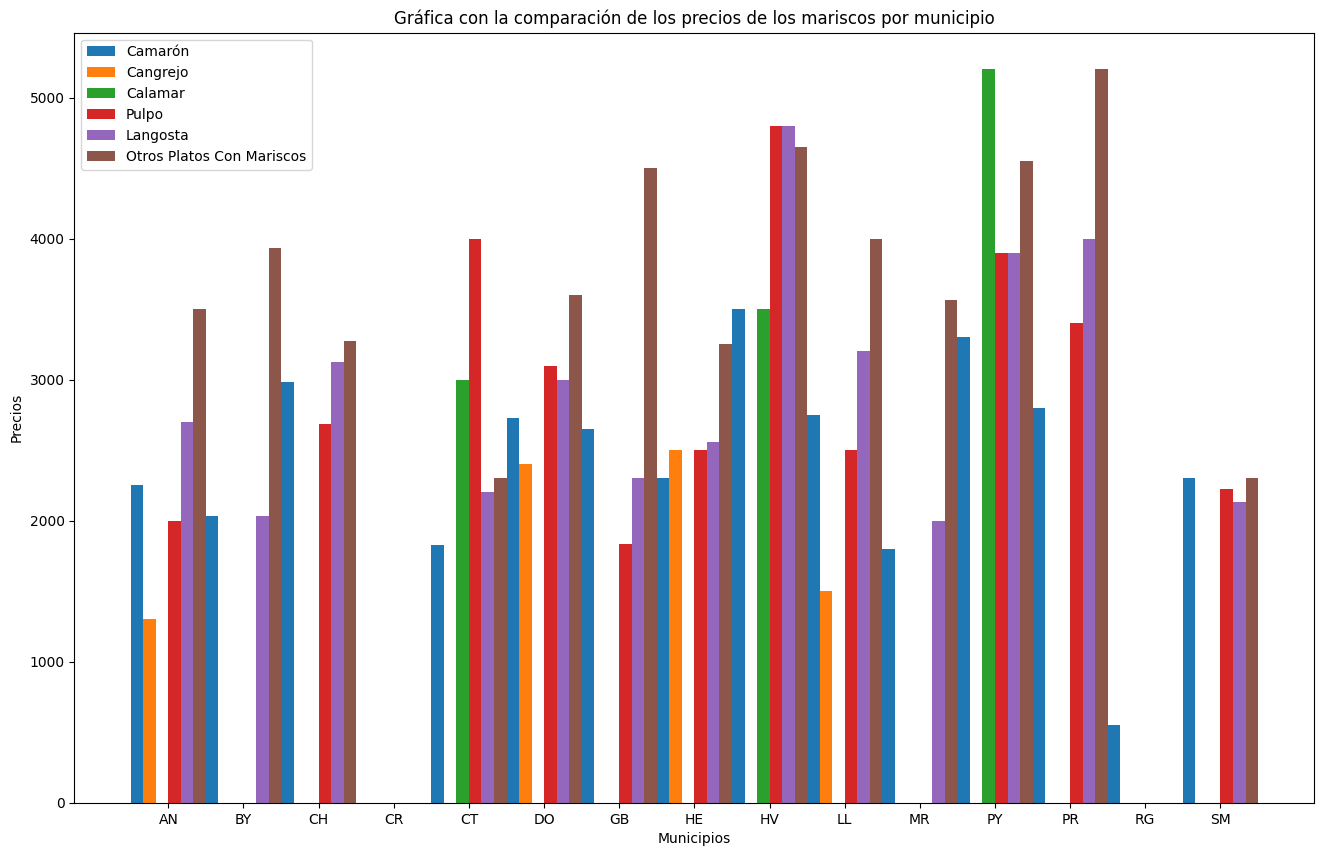

In [31]:
mariscos()

  A continuación una tabla con los lugares que ofrecen platos con calamares :

In [17]:

df_calamares


,restaurate,precio media de los calamares
0,Cafe Crystal,3000.0
1,Finca La Pinta,3500.0
2,Chachachá,6460.0
3,Habana Tokio,3425.0
4,Yarini,2500.0
5,Toros y Tapas,5200.0


 Estamos en el siglo, en la comunicación y la información lo es todo, lo que implica que todo restaurante que no cuente con por lo menos un télefono fijo o móvil, o una red social, está aplicando una mala estrategia de marketing ya que una mala promoción del negocio y una mala comunicación con los lientes puede ser fatal en estos tiempos. Por lo que la comparación entre el por ciento de lugares que cuentan con comunicación telefónica y los que poseen por lo menos una red social, siendo que este ultímo el más alto, ya que la conexón a internet en más asequible monetariamente que la telefonía fija y la móvil.

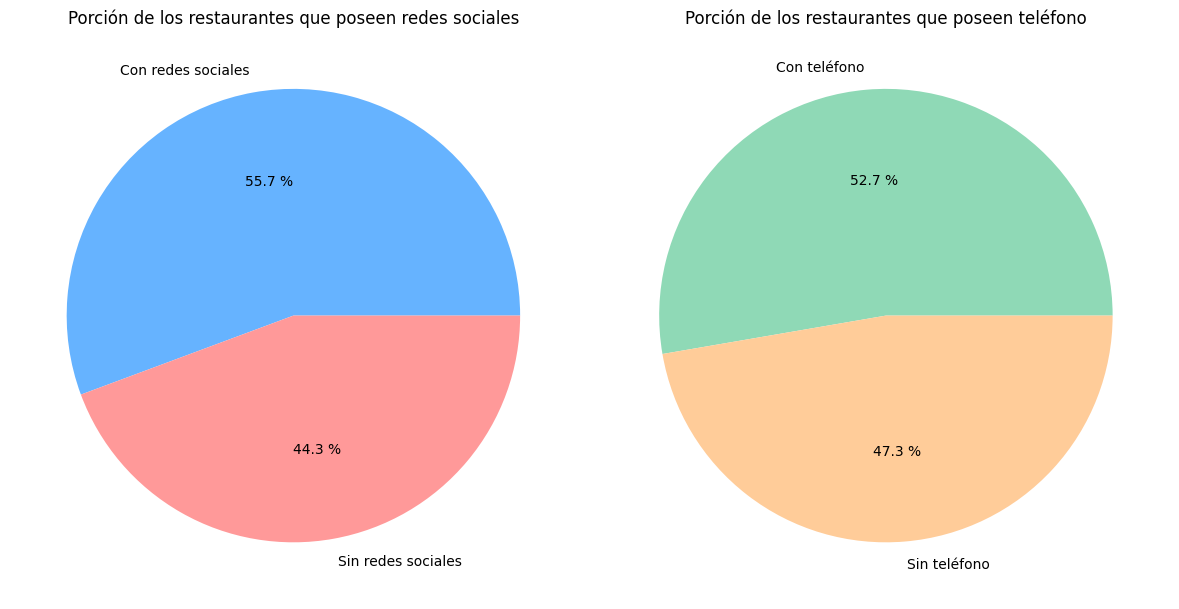

In [18]:
comunications()

 Una pregunta de todo cubano que vive bajo el fuerte calor de Cuba, es donde ir a tomar un buen helado , por lo que les presento una relación de las heladerías de La Habana, y que en la cantidad real también son pocas comparando con la demanda.

In [19]:
ice_cream()

,Restaurante,Presupuesto,Municipio
0,Heladería Coppelia,80.0,PR
1,Helado Mio,330.0,HV
2,Yum Yum Gelato,820.0,CH
3,Dong Te,880.0,PY
4,Lacteos Ikoko,950.0,DO
5,Bueníssimo heladería,1075.0,CH
6,Sabor Cid,1185.0,PR


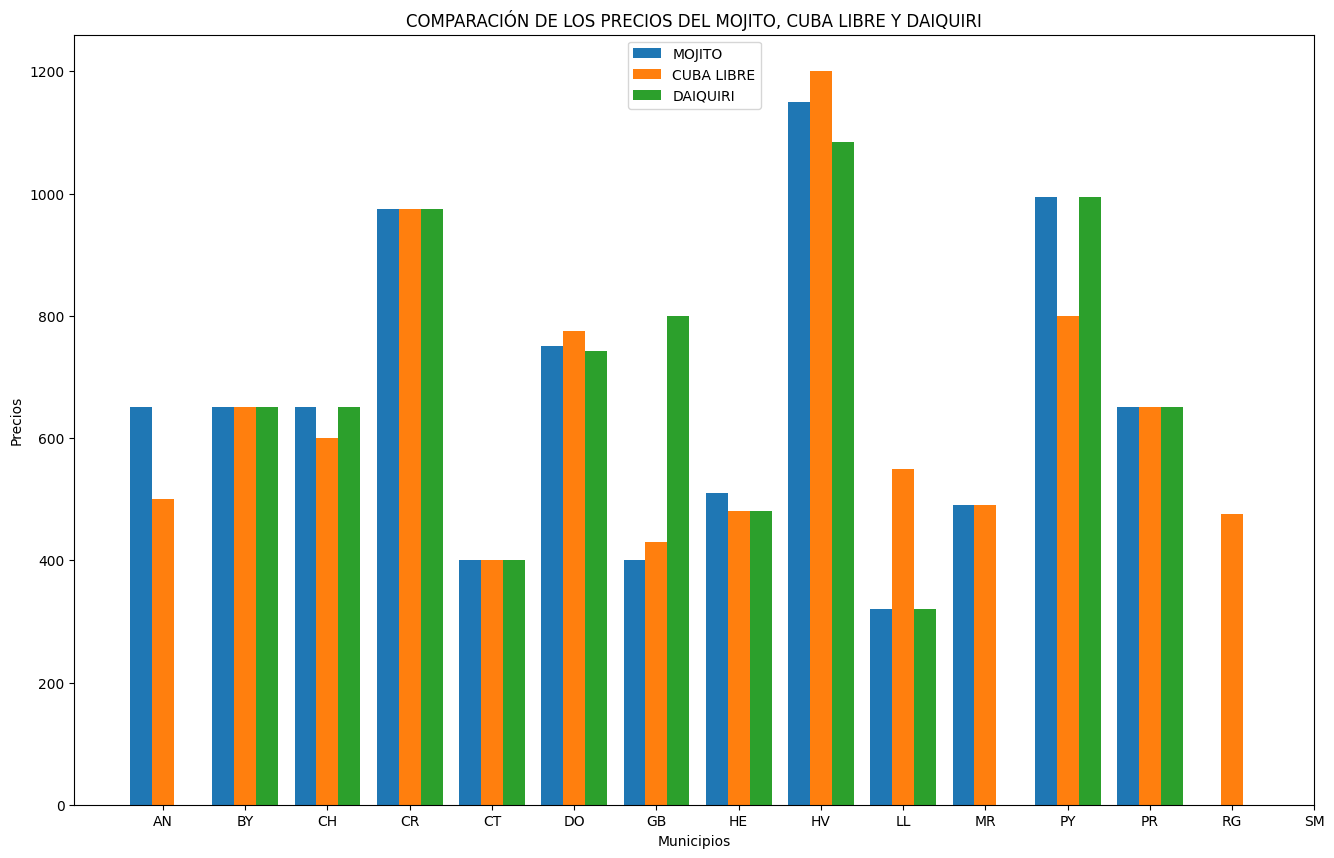

In [32]:
bar()

In [21]:

from library import data
from library import names
from library import muni
from library import price
from library import list_mar
from library import dict_num_values
from library import dict_keys
from library import remove_duplicados
from library import media
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

def list_hv():
    hv = []
    for i in names:
        if data[i]["municipality"] == "HV":
            hv.append(i)
    return hv

def list_anidada(l: list):
    new_list = []
    for i in l:
        if type(i) != list:
            new_list.append(i)
        else:
            new_list.extend(list_anidada(i))
    return new_list

                                                       HABANA VIEJA

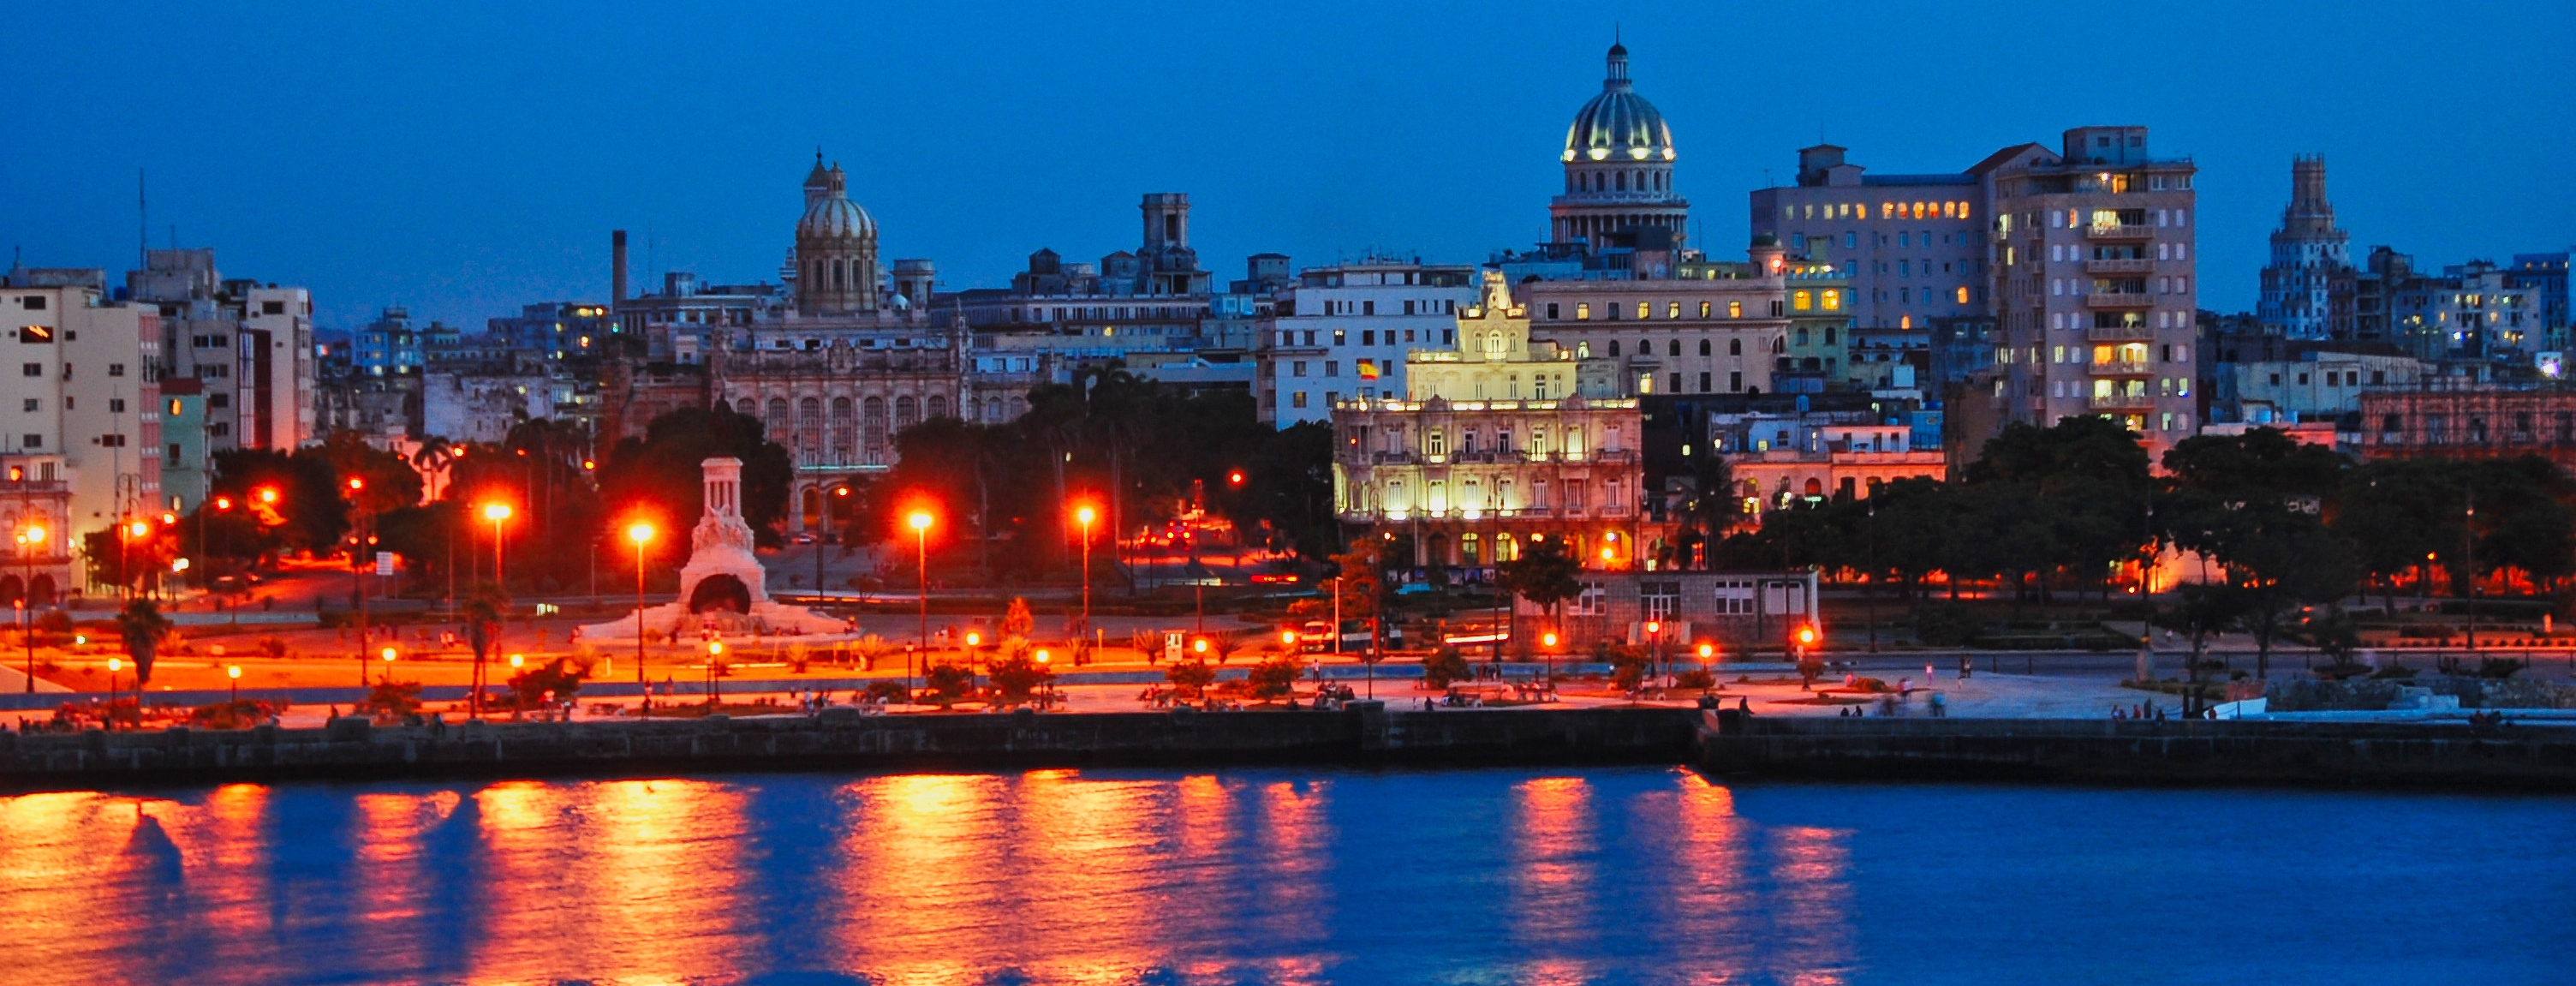

In [22]:

Image(filename= "Habana_Vieja_de_noche.jpg")


 Ahora vamos a ir un poco más adentro y vamos concentrarnos en uno de los municipios principales del proyecto, Habana Vieja, que por su "belleza" y "Antiguedades atrae a muchos turístas en todas las épocas del año, principalmente en el verano, a finales de año y a principios de año que es cuando los habitantes de los dos hemiferios celebran las tan añoradas las vacaciones , or lo que sería interesante realizar un análisis del comportamiento de la gastronomía en este municipio de la capital, mayor centro turístico de la Habana junto a Playa y Plaza De La Revolución.

 A continuación le muestro una tabla con el presupuesto requerido de cada restaurante del municipio, basado en la suma de todos los tipos de plato, cuya tabla está ordenada de forma ascedente, para que saque usted sus propias conclusiones:

In [23]:
df_hv()

,Restaurante,Presupuesto Requerido Por Persona
0,LK Pizzería,725
1,La Pérgola,1220
2,La Hamburguesita,1505
3,Helado Mio,1545
4,A Prado Y Neptuno,1877
5,La Bodeguita del Medio,3827
6,Teniente Rey 360,4260
7,Habana Tokio,4675
8,Venami,5585
9,Dona Eutimia,5930


 Hay personas que dicen que las casualidades no existen, y en el ámbito gastronómico no se hace la diferencia por lo hay que saber con precio puede enfrentar en lugar en el municipio en algún tipo de plato, incluyendo los desayunos, que son los más consumidos por los no nativos que tienen ese hábito de consumo y lo cual influye en que sea el plato más caro del municipio, lo que en la siguente gráfica se puede observar de manera más explícita.

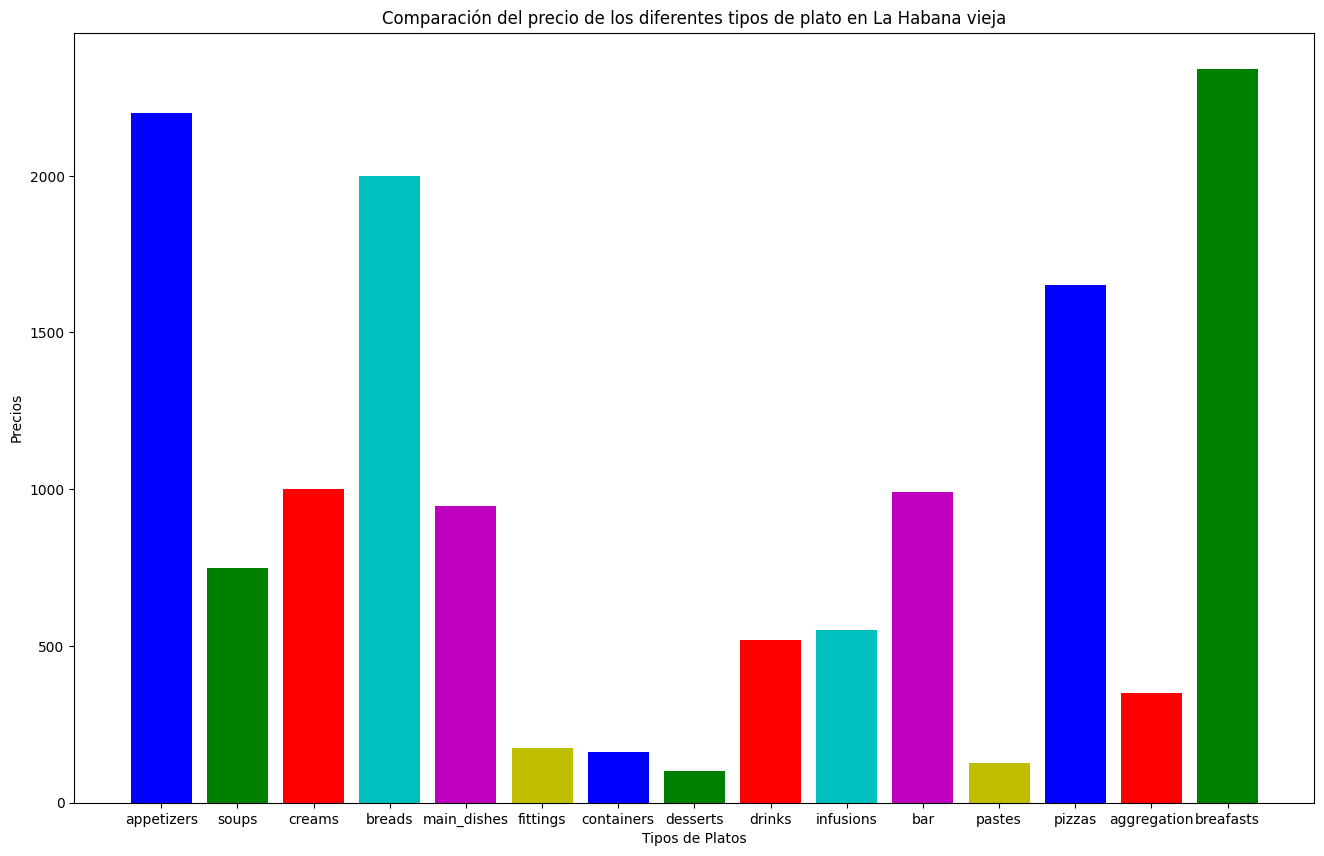

In [24]:
graph_dish_hv()

  Cómo no es de estrañar una gran parte de los restaurantes de La Habana Vieja cuentan con sevicio bar, para que los extranjeros puedan disfrutrar de los tragos y los cócteles cubanos, ya que:

In [25]:
bar_hv()

'El 63.33333333333333 % de los restaurantes de la Habana Vieja cuentan con servicio de bar'

 Y ahora les muestro una una comparación de los precios de los bares del municipio donde se puede ir a compartir mediante una gráfica de barras :

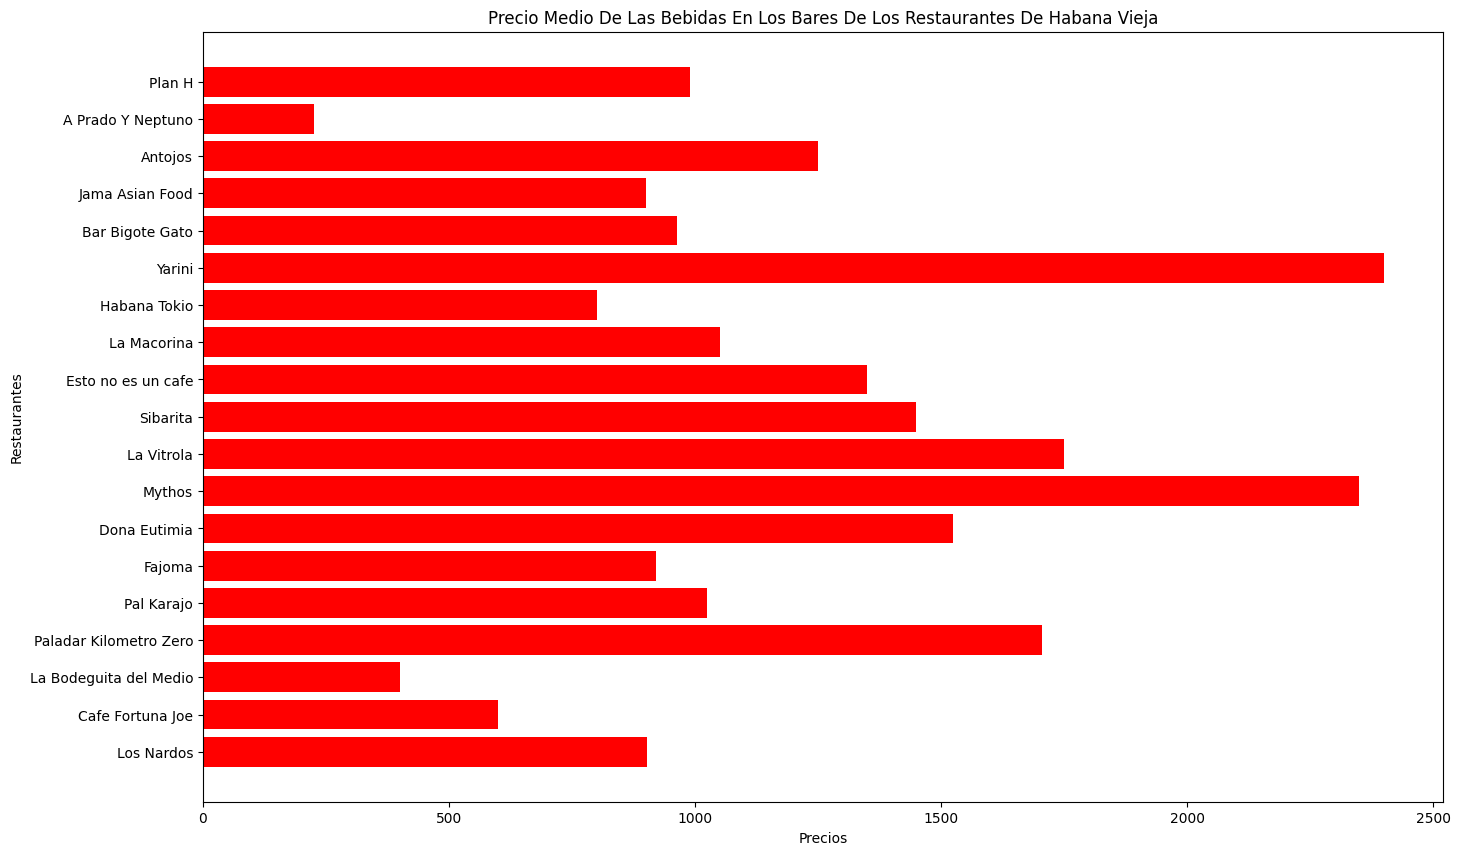

In [26]:
graph_bar_hv()

 En la Habana Vieja a pesar de que la parte con mayor flujo de turístas está más cerca del mar, durante la mayor parte del año abunda grandemente el calor por lo que cuando se camina sus calles, es necesario estar bien hidratado, por lo que cuando no se anda un pomo de agua, ya que es lo más liviano para portar, se debe recurrir a un establecimiento donde vendan algún tipo de bebida por lo que les traigo tambien una relación con los precios de las bebidas en este municipio. Ya que: 

In [27]:
count_drinks()

'El 66.66666666666666 % de los restaurantes de Habana Vieja venden bebidas alcohólicas y no alcohólicas'

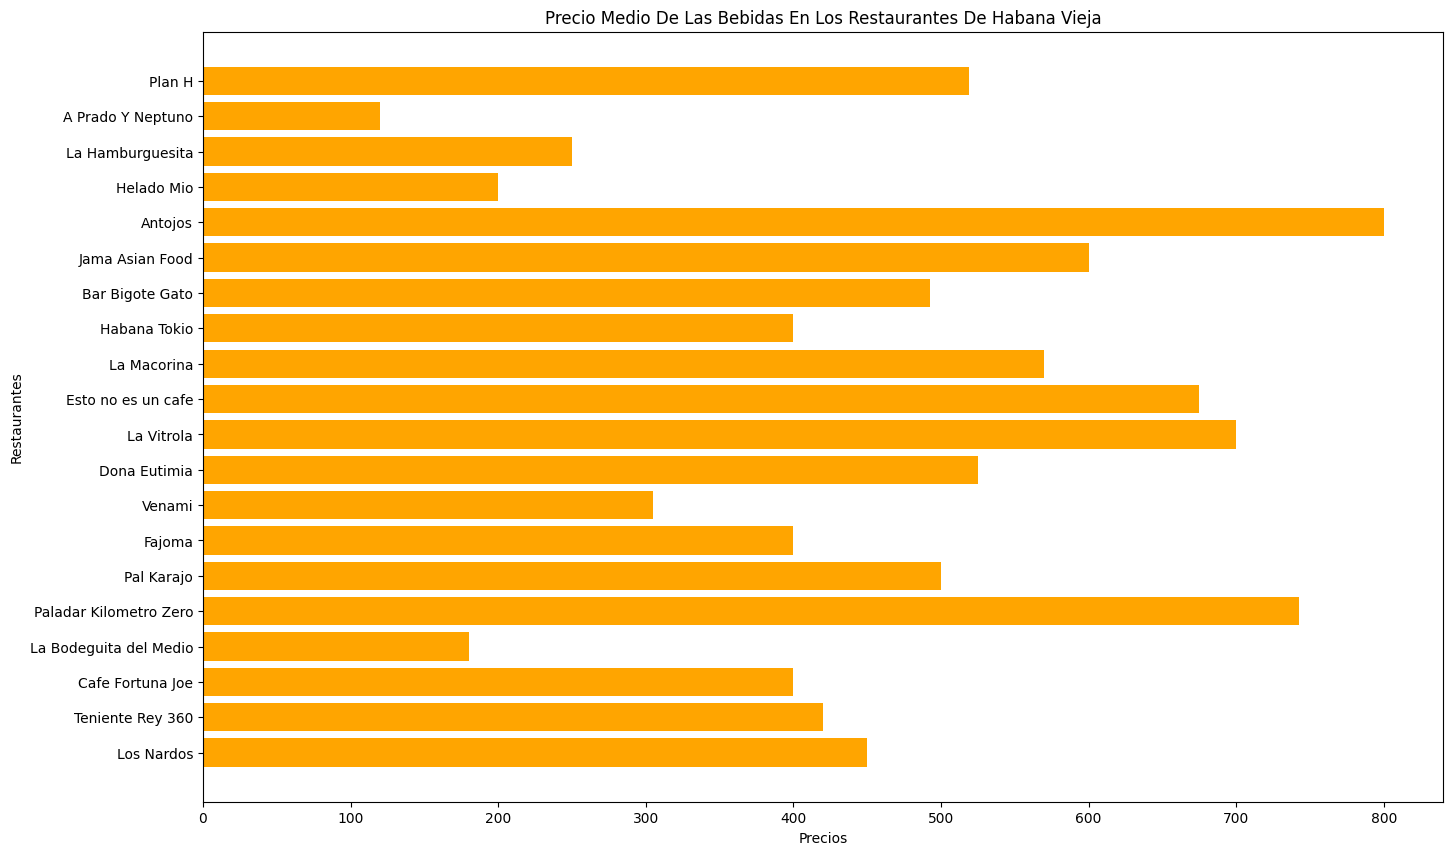

In [28]:
graph_drinks_hv()